# Sampling quantum states
Sampling single mode quantum states for use in quantum phase space simulations using the truncated Wigner and +P distributions. Similar methods can be applied to multimode simulations of Bose-Einstein condensates.

We use the methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033)

with erratum [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

A complete erratum can be found at [SciPost](https://scipost.org/commentaries/10.1016/j.optcom.2009.06.033/).

# New States
We have add sampling for the additional distributions:
- Fock state for +W
- Thermal state for +P
- Bogoliubov states for P,Q,W

# Papers
For more information on Bose-Einstein condensate applications, see the review 

_Dynamics and statistical mechanics of ultra-cold Bose gases using c-field techniques_, P. B. Blakie, A. S. Bradley, M. J. Davis, R. J. Ballagh, and C. W. Gardiner, [Advances in Phyiscs 57, 363 (2008)](http://dx.doi.org/10.1080/00018730802564254)

For a recent paper using this package, see

_Steady states, squeezing, and entanglement in intracavity triplet down conversion_,
Mathew D. E. Denys, Murray K. Olsen, Luke S. Trainor, Harald G. L. Schwefel, and Ashton S. Bradley,  [Optics Communications 484 (2021) 126699](https://doi.org/10.1016/j.optcom.2020.126699), [arXiv](https://arxiv.org/abs/1907.09572)

# Examples


In [37]:
using Plots, LaTeXStrings, Plots.Measures
lw = 1.5    # linewidth
fs = 10
gr(fontfamily="Computer Modern",
size=(350,350),xlabel=L"\alpha_r",ylabel=L"\alpha_i",
	    xlims=(-20,20),ylims=(-20,20),ms=1,markerstrokewidth = 0,   # no border
		frame=:box,legend=false,grid=false,aspect_ratio=1,colorbar=true,
		foreground_color_legend = nothing,
linewidth=lw,guidefontsize=fs,tickfontsize=fs,legendfontsize=fs,
margin=5mm)

Plots.GRBackend()

In [63]:
using PhaseSpaceTools
function show_meansW(N,State,p,Dist)
	s = State(p...)
	a,ā = Dist(s,N)
    n̄ = mean(a.*ā)-.5
    Vn= mean(a.^2 .*ā.^2)-mean(a.*ā)-n̄.^2
    Text("
	N = $N samples.\n  
    Averages:\n
	<â> = $(mean(a))\n
	<â⁺â> = $(n̄)\n
	V(n̂) = $(Vn)\n
	Relative width = $(sqrt(abs(Vn))/abs(n̄))")
end
function sample_plot(N,State,p,Dist)
	s = State(p...)
	a,ā = Dist(s,N)
	scatter(real(a),imag(a),mc=:red,left_margin=0mm,bottom_margin=0mm)
end

sample_plot (generic function with 1 method)

# Coherent State
Let's look at the coherent state in different representations.

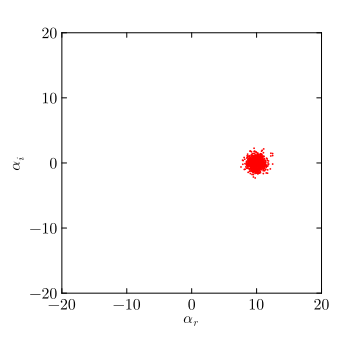

In [64]:
sample_plot(1000,Coherent,10,husimiQ)

In [65]:
show_meansW(100000,Coherent,10,wigner) # Poisson number statistics


	N = 100000 samples.
  
    Averages:

	<â> = 10.00115182989829 + 0.0006570093437438544im

	<â⁺â> = 100.02489906423803 + 0.0im

	V(n̂) = 100.30838608535669 + 0.0im

	Relative width = 0.10012914312848599

# Thermal State

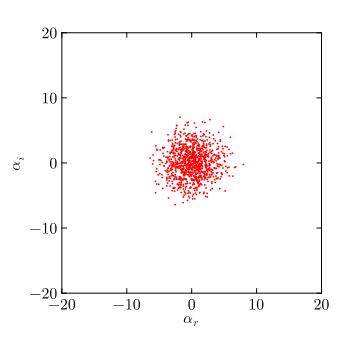

In [66]:
sample_plot(1000,Thermal,(0,10),wigner)

In [67]:
show_meansW(100000,Thermal,(0,10),wigner)


	N = 100000 samples.
  
    Averages:

	<â> = 0.010968395444709617 + 0.012743037312327012im

	<â⁺â> = 10.015582293363279 + 0.0im

	V(n̂) = 110.3570152670343 + 0.0im

	Relative width = 1.0488750849808672

# Squeezed state

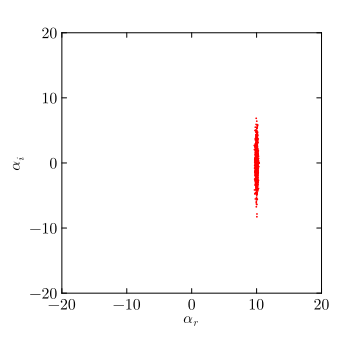

In [68]:
β = 10 
ϕ = 0
r = 1.5
ϵ = r*exp(2*im*ϕ)
sample_plot(1000,Squeezed,(β,ϵ),wigner)

In [69]:
show_meansW(100000,Squeezed,(β,ϵ),wigner)


	N = 100000 samples.
  
    Averages:

	<â> = 9.999908319724568 - 0.0009369987587446274im

	<â⁺â> = 104.53045123814105 + 0.0im

	V(n̂) = 55.5118161006576 + 0.0im

	Relative width = 0.07127707885280582

# Fock state

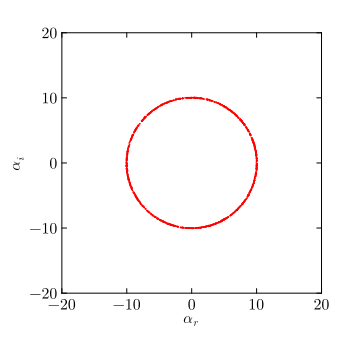

In [71]:
sample_plot(1000,Fock,100,wigner)

In [72]:
show_meansW(100000,Fock,100,wigner)


	N = 100000 samples.
  
    Averages:

	<â> = -0.004714110415853604 + 0.015016216273319703im

	<â⁺â> = 100.00346376294385 + 0.0im

	V(n̂) = -0.00045476167724700645 + 0.0im

	Relative width = 0.0002132440327771997

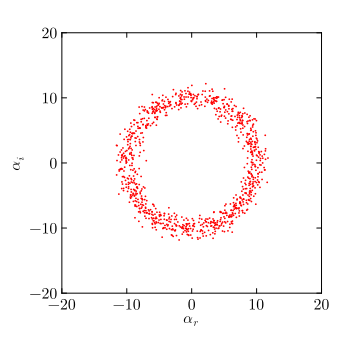

In [73]:
sample_plot(1000,Fock,100,positiveP)

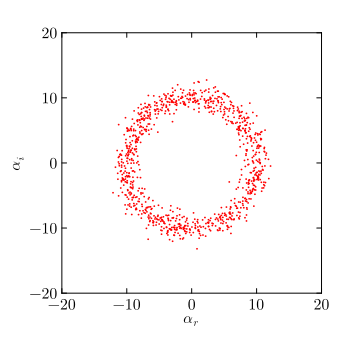

In [74]:
sample_plot(1000,Fock,100,positiveW)

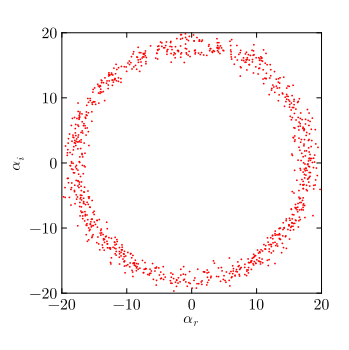

In [77]:
sample_plot(1000,Fock,321,positiveP) #uses asymptotic expansion for n>320

# Crescent state
A Kerr interaction will create shear for a coherent state. This can be modelled using a crescent state.

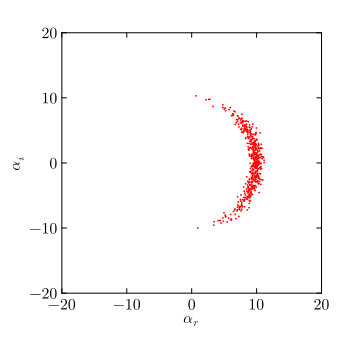

In [78]:
sample_plot(500,Crescent,(10,0,.5),wigner)

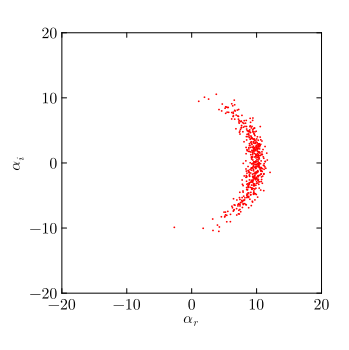

In [79]:
sample_plot(500,Crescent,(10,0,.5),husimiQ)

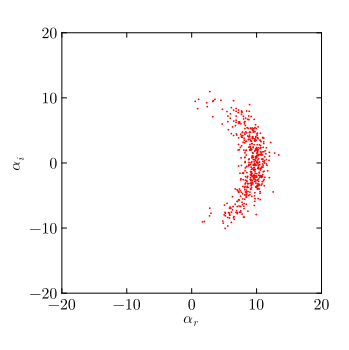

In [80]:
sample_plot(500,Crescent,(10,0,.5),positiveP)